In [255]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import random

In [256]:
import math
def distance2(l):
    p, q = l[0], l[1]
    return math.sqrt((p[0]-q[0])**2 + (p[1]-q[1])**2)


In [257]:
def fuerzabruta(ps):
    bestpair = [ps[0],ps[1]]
    bestd = distance2(bestpair)
    for i in range(len(ps)):
        for j in range(i+1,len(ps)):
            if distance2([ps[i],ps[j]]) < bestd:
                bestpair = [ps[i],ps[j]]
                bestd = distance2(bestpair)
    return bestpair

In [258]:
def closestPair(Px,Py):
    n = len(Px)
    if n < 4:
        return fuerzabruta(Px)
    Dx = Px[n//2-1][0]
    #Dividimos
    Lx = [p for p in Px if p[0] <= Dx]
    Ly = [p for p in Py if p[0] <= Dx]
    Rx = [p for p in Px if p[0] > Dx]
    Ry = [p for p in Py if p[0] > Dx]
    resL = closestPair(Lx,Ly)
    resR = closestPair(Rx,Ry)
    # calculamos mejor global hasta ahora
    bestd = min(distance2(resL),distance2(resR))
    if distance2(resL) <= bestd:
        bestpair = resL
    else:
        bestpair = resR
    #creamos banda
    By = [p for p in Py if abs(p[0] - Dx) < bestd]
    #comparamos exahustivamente un punto en By con los que están en las siguientes 11 posiciones
    for i in range(len(By)):
        for j in range(i+1, min(i+12, len(By))):
            if distance2([By[i],By[j]]) < bestd:
                bestpair = [By[i],By[j]]
                bestd = distance2(bestpair)
    return bestpair
    
    

In [259]:
def mkpxpy(ps):
    Px = sorted(ps,key = lambda p: p[0])
    Py = sorted(ps,key = lambda p: p[1])
    return (Px,Py)

In [260]:
def mkrandompoints(n):
    return [[random.random(), random.random()] for i in range(n)]
    

In [261]:
def plotpoints(ps):
    x = [p[0] for p in ps]
    y = [p[1] for p in ps]
    plt.figure(figsize = (8, 8))
    plt.scatter(x,y)
    plt.xlabel('X')
    plt.ylabel('Y')

In [262]:
def plotnearestpair(ps):
    #primero todos
    xs = [p[0] for p in ps]
    ys = [p[1] for p in ps]
    plt.figure(figsize = (8, 8))
    plt.scatter(xs,ys)
    #ahora los más cercanos
    ps = closestPair(*mkpxpy(ps))
    xs = [p[0] for p in ps]
    ys = [p[1] for p in ps]
    plt.scatter(xs,ys)
    plt.xlabel('X')
    plt.ylabel('Y')

<IPython.core.display.Javascript object>


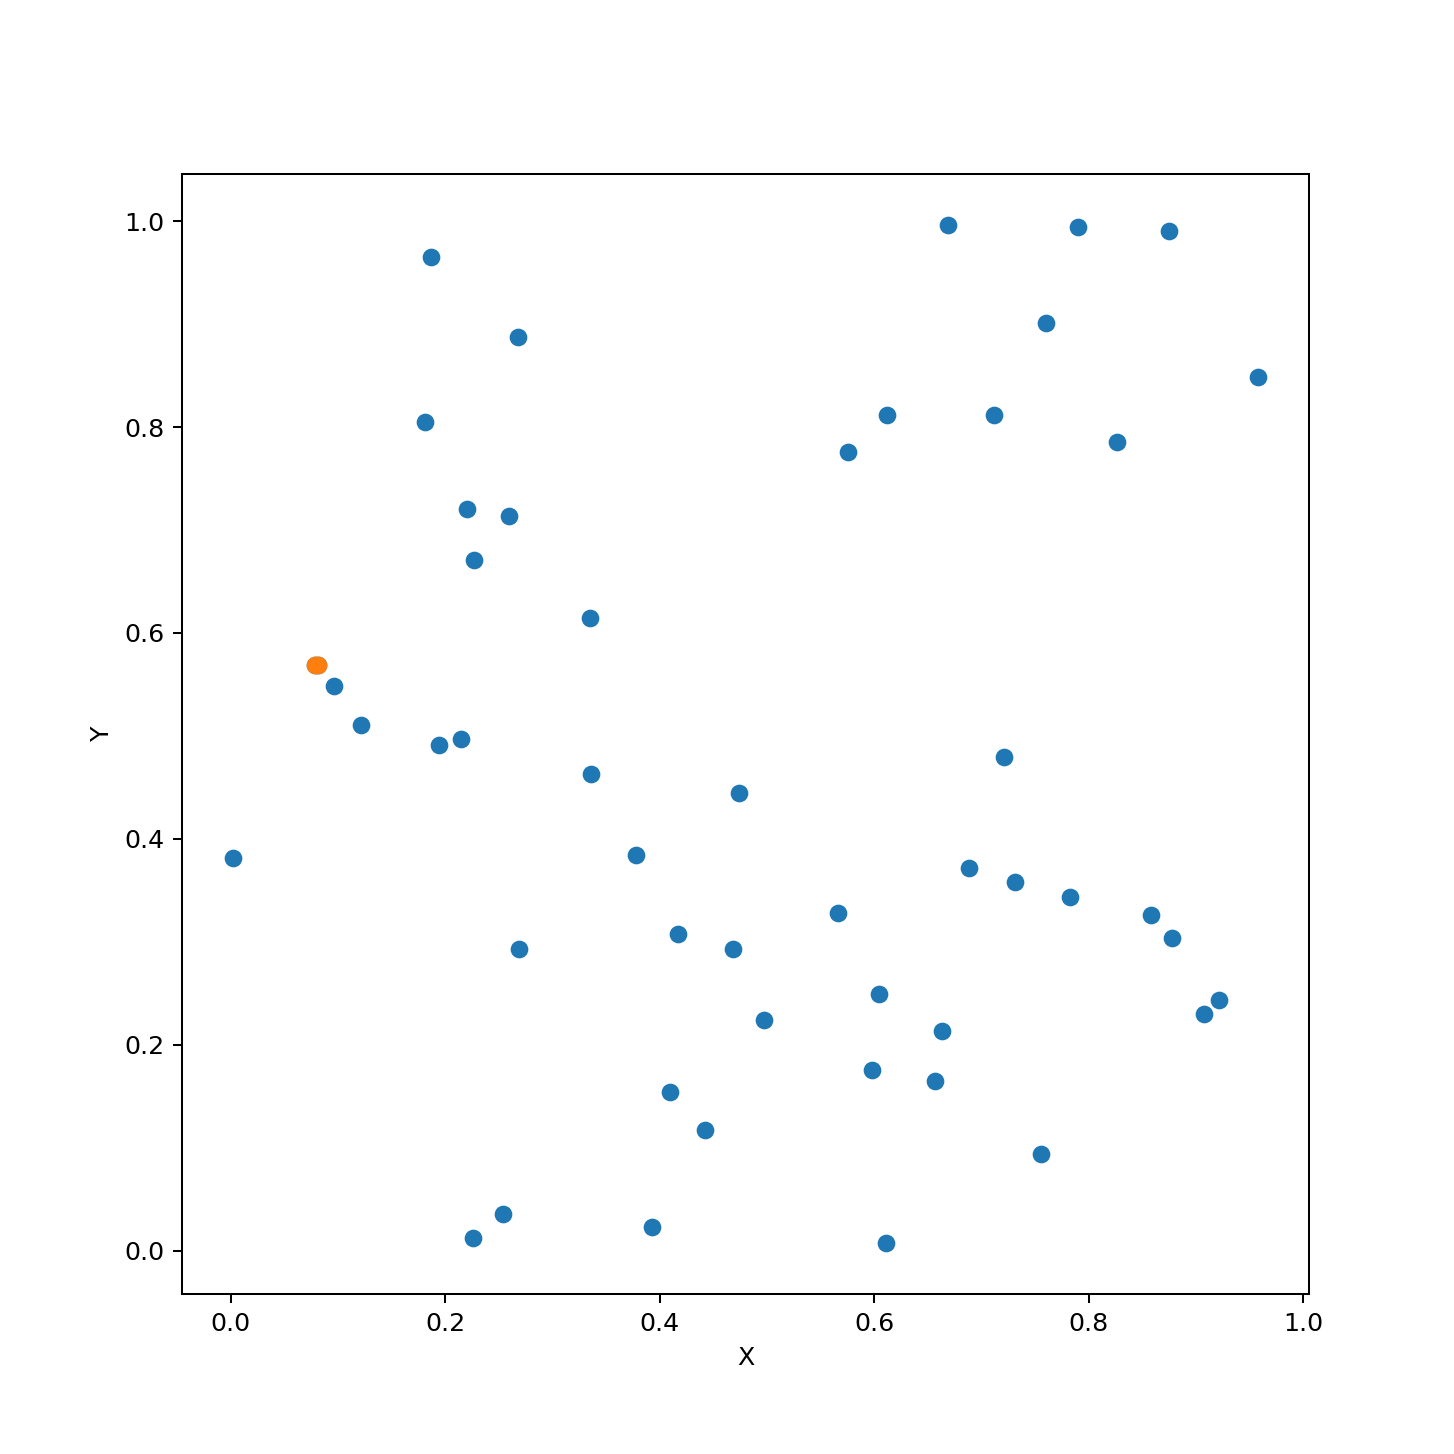

In [266]:
ps = mkrandompoints(50)
plotnearestpair(ps)
